In [1]:
!pip install scikit-learn matplotlib seaborn

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rejeeshkoshy","key":"ba20dd6ff5838b6f7a078a7074827bf3"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d saurabhshahane/classification-of-malwares

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/classification-of-malwares
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/435k [00:00<?, ?B/s]
100% 435k/435k [00:00<00:00, 107MB/s]


In [6]:
!unzip classification-of-malwares.zip

Archive:  classification-of-malwares.zip
  inflating: ClaMP_Integrated-5184.csv  
  inflating: ClaMP_Raw-5184.csv      


In [7]:
data = pd.read_csv('ClaMP_Raw-5184.csv')  # Replace 'file_name.csv' with the actual file name
print(data.head())

   e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
0    23117     144     3       0          4           0       65535     0   
1    23117     144     3       0          4           0       65535     0   
2    23117     144     3       0          4           0       65535     0   
3    23117     144     3       0          4           0       65535     0   
4    23117     144     3       0          4           0       65535     0   

   e_sp  e_csum  ...  CheckSum  Subsystem  DllCharacteristics  \
0   184       0  ...   1194954          3                  64   
1   184       0  ...         0          2                   0   
2   184       0  ...     67688          2                 320   
3   184       0  ...    113668          2                1344   
4   184       0  ...     69089          2               33088   

   SizeOfStackReserve  SizeOfStackCommit  SizeOfHeapReserve  SizeOfHeapCommit  \
0             1048576               4096            1048576      

In [8]:
def apply_decision_tree(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    decision_model = DecisionTreeClassifier(random_state=1)
    decision_model.fit(x_train, y_train)

    predict = decision_model.predict(x_test)
    print(classification_report(y_test, predict))
    print(f'decision tree result is: {mean_squared_error(y_test, predict)}')

In [9]:
def apply_random_forest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    forest_model = RandomForestClassifier(random_state=1)
    forest_model.fit(x_train, y_train)

    predict = forest_model.predict(x_test)
    predict = [round(item) for item in predict]
    print(classification_report(y_test, predict))
    print(f'random forest result is: {mean_squared_error(y_test, predict)}')

In [10]:
def apply_XGBoost(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    xgb_model = XGBClassifier(use_label_encoder=False)
    xgb_model.fit(x_train, y_train)

    predict = xgb_model.predict(x_test)
    print(classification_report(y_test, predict))
    print(f'XGBoost result is: {mean_squared_error(y_test, predict)}')

In [11]:
start = time.time()
dataset = pd.read_csv("ClaMP_Raw-5184.csv")
dataset = dataset[dataset < 2**31].fillna(0)

features = dataset.columns[:-1]
x = dataset.loc[:, features]
y = dataset["class"]

apply_decision_tree(x, y)
apply_XGBoost(x, y)
apply_random_forest(x, y)

end = time.time()
print(f'time passed is: {end - start}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       477
           1       0.97      0.96      0.97       560

    accuracy                           0.96      1037
   macro avg       0.96      0.96      0.96      1037
weighted avg       0.96      0.96      0.96      1037

decision tree result is: 0.03567984570877531


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       505
           1       0.97      0.98      0.98       532

    accuracy                           0.98      1037
   macro avg       0.98      0.98      0.98      1037
weighted avg       0.98      0.98      0.98      1037

XGBoost result is: 0.021215043394406944
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       517
           1       0.98      0.99      0.98       520

    accuracy                           0.98      1037
   macro avg       0.98      0.98      0.98      1037
weighted avg       0.98      0.98      0.98      1037

random forest result is: 0.01639344262295082
time passed is: 1.5684471130371094


# Malware Prediction with 97% accuracy and F-1 Score

In [13]:
df = pd.read_csv('/content/ClaMP_Integrated-5184.csv')

In [14]:
df=df.drop(['e_cblp','e_cp','e_cparhdr','e_maxalloc','e_sp','e_lfanew'],axis=1)
df.fillna(0, inplace=True)
df=df.drop(['NumberOfSections','CreationYear'],axis=1)


In [17]:
le =  LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue

X = df.drop(['class'],axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score

model = GaussianNB()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(y_pred[:15])

[1 1 1 0 0 1 0 1 1 0 1 1 1 1 0]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NumberOfSections             5210 non-null   int64  
 1   CreationYear                 5210 non-null   int64  
 2   FH_char0                     5210 non-null   int64  
 3   FH_char1                     5210 non-null   int64  
 4   FH_char2                     5210 non-null   int64  
 5   FH_char3                     5210 non-null   int64  
 6   FH_char4                     5210 non-null   int64  
 7   FH_char5                     5210 non-null   int64  
 8   FH_char6                     5210 non-null   int64  
 9   FH_char7                     5210 non-null   int64  
 10  FH_char8                     5210 non-null   int64  
 11  FH_char9                     5210 non-null   int64  
 12  FH_char10                    5210 non-null   int64  
 13  FH_char11         

In [19]:
from sklearn.metrics import  recall_score, accuracy_score, classification_report

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

0.9401381427475057
              precision    recall  f1-score   support

           0       0.98      0.90      0.93       622
           1       0.91      0.98      0.94       681

    accuracy                           0.94      1303
   macro avg       0.94      0.94      0.94      1303
weighted avg       0.94      0.94      0.94      1303

F1 Score:  0.9448373408769448


[[557  65]
 [ 13 668]]


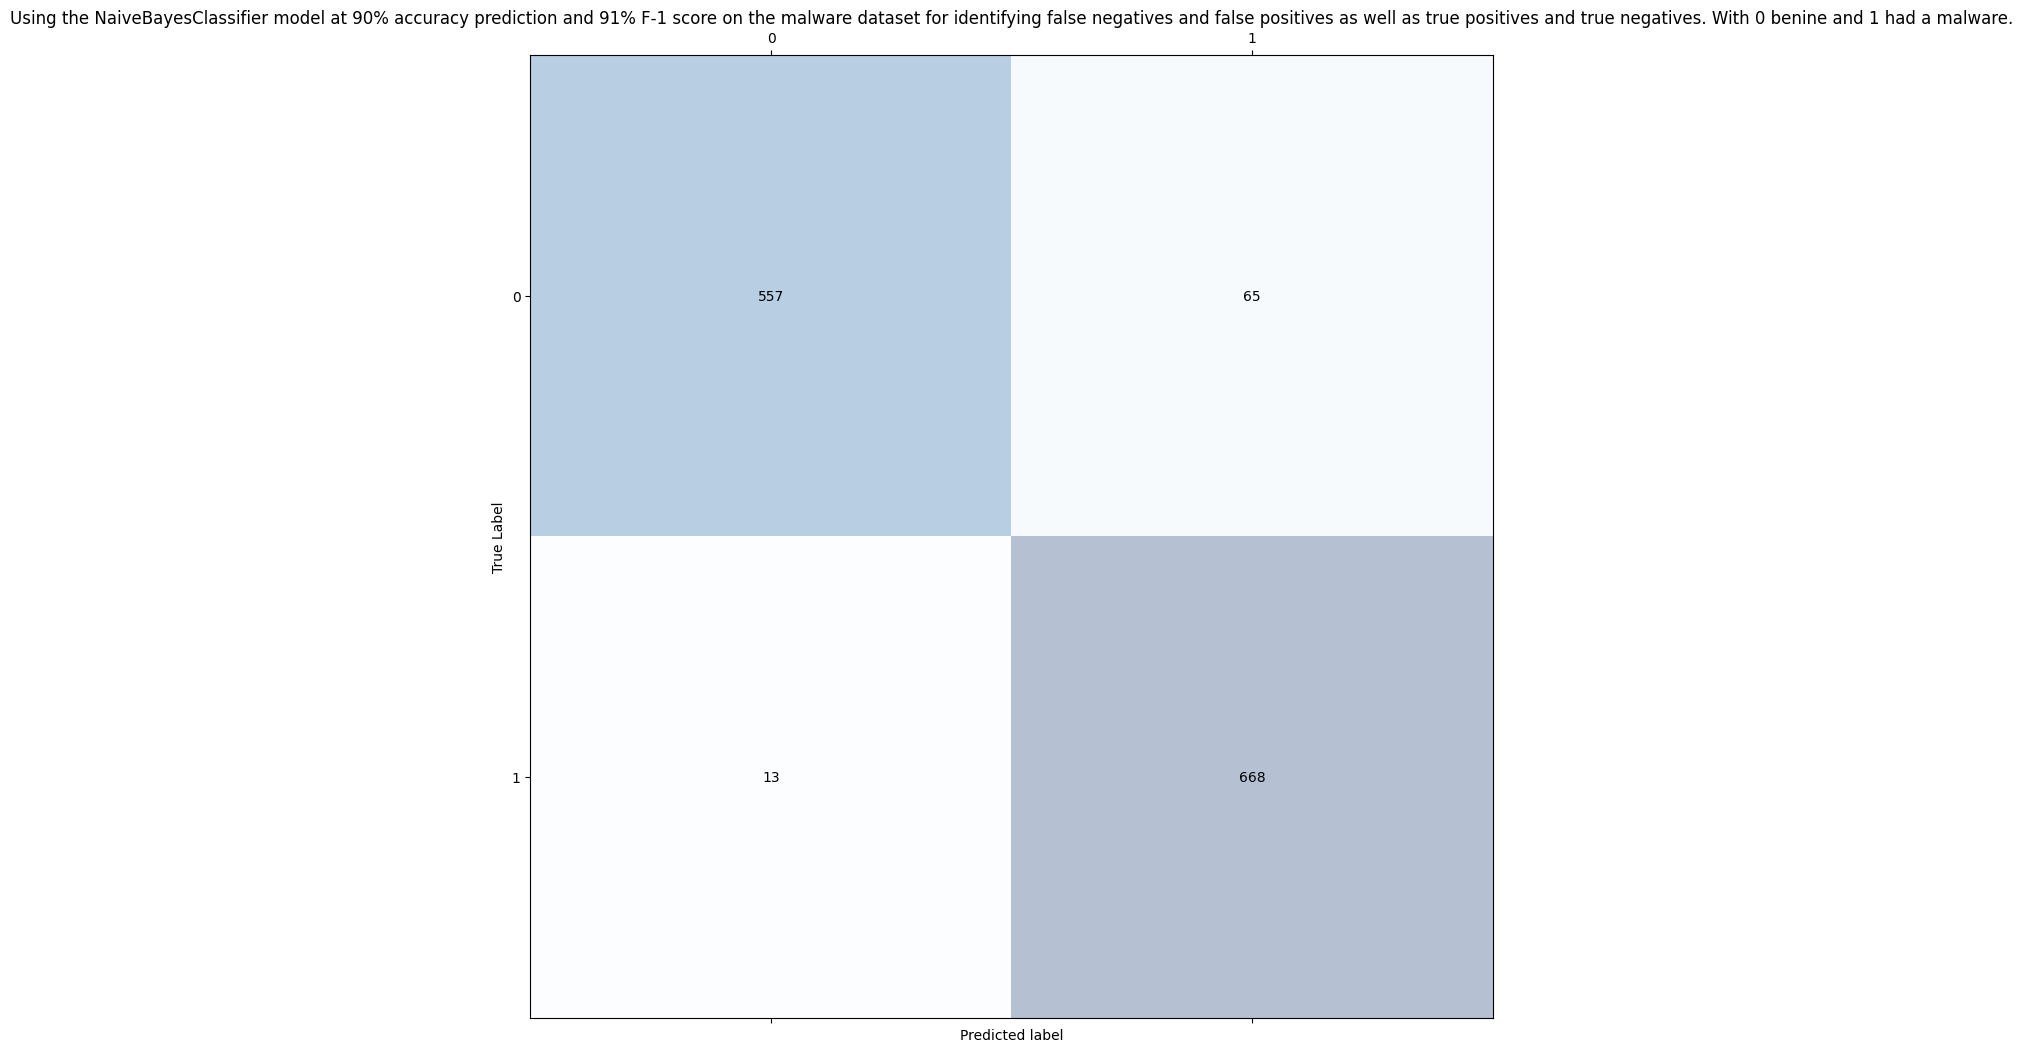

[[557  65]
 [ 13 668]]


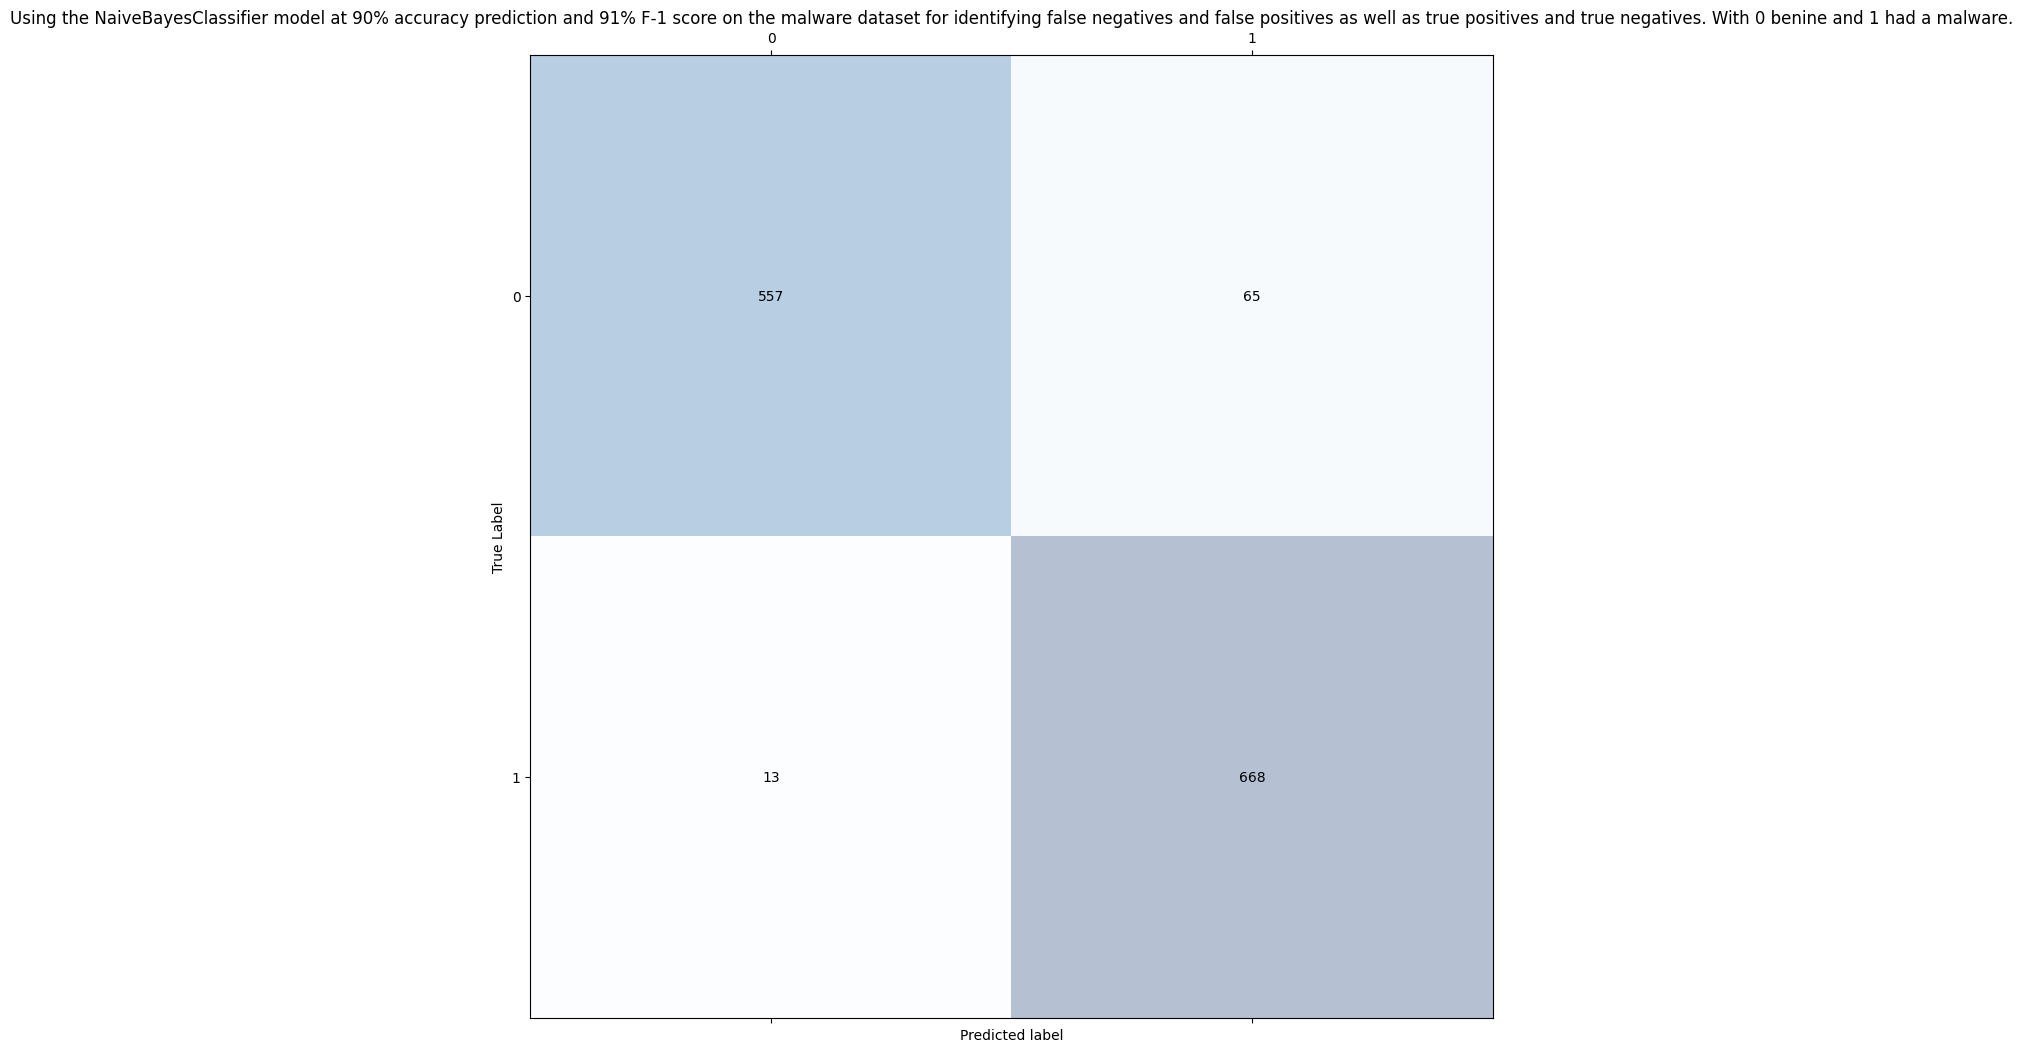

In [21]:
print(confmat)

fig, ax =plt.subplots(figsize=(12.5, 12.5))
ax.matshow(confmat,  cmap=plt.cm.Blues, alpha=0.30)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.title('Using the NaiveBayesClassifier model at 90% accuracy prediction and 91% F-1 score on the malware dataset for identifying false negatives and false positives as well as true positives and true negatives. With 0 benine and 1 had a malware.')
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

clf = AdaBoostClassifier()

clf.fit(X_train,y_train)

AdaBoostClassifier()

In [23]:
y_clf=clf.predict(X_test)
b = accuracy_score(y_clf, y_test)
print(b)

print(classification_report(y_test,y_clf))
print('F1 Score: ',f1_score(y_test,y_clf,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_clf)

0.9700690713737529
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       622
           1       0.97      0.98      0.97       681

    accuracy                           0.97      1303
   macro avg       0.97      0.97      0.97      1303
weighted avg       0.97      0.97      0.97      1303

F1 Score:  0.9714703730797366


In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_log = log.predict(X_test)
c = accuracy_score(y_log, y_test)
print(c)

print(classification_report(y_test,y_log))
print('F1 Score: ',f1_score(y_test,y_log))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_log)

0.9616270145817345
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       622
           1       0.96      0.96      0.96       681

    accuracy                           0.96      1303
   macro avg       0.96      0.96      0.96      1303
weighted avg       0.96      0.96      0.96      1303

F1 Score:  0.9633431085043989


In [27]:
from sklearn import svm
from sklearn.metrics import f1_score

svm = svm.SVC()
svm.fit(X_train,y_train)
y_svm = svm.predict(X_test)

In [28]:
d = accuracy_score(y_svm, y_test)
print(d)

print(classification_report(y_test,y_svm,zero_division=1))
print('F1 Score: ',f1_score(y_test,y_svm,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_svm)

0.9600920951650038
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       622
           1       0.95      0.97      0.96       681

    accuracy                           0.96      1303
   macro avg       0.96      0.96      0.96      1303
weighted avg       0.96      0.96      0.96      1303

F1 Score:  0.9621542940320232


In [29]:
tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)
DecisionTreeClassifier()
y_tree= tree.predict(X_test)
f = accuracy_score(y_tree, y_test)
print(f)

print(classification_report(y_test,y_tree))
print('F1 Score: ',f1_score(y_test,y_tree))

confmat = confusion_matrix(y_true=y_test, y_pred=y_tree)

0.9808135072908672
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       622
           1       0.98      0.98      0.98       681

    accuracy                           0.98      1303
   macro avg       0.98      0.98      0.98      1303
weighted avg       0.98      0.98      0.98      1303

F1 Score:  0.9816581071166545


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y_disc= LinearDiscriminantAnalysis()
y_disc.fit(X_train,y_train)
LinearDiscriminantAnalysis()
y_lin=y_disc.predict(X_test)

In [31]:
f = accuracy_score(y_lin, y_test)
print(f)

print(classification_report(y_test,y_lin))
print('F1 Score: ',f1_score(y_test,y_lin))

confmat = confusion_matrix(y_true=y_test, y_pred=y_lin)

0.9378357636224098
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       622
           1       0.92      0.96      0.94       681

    accuracy                           0.94      1303
   macro avg       0.94      0.94      0.94      1303
weighted avg       0.94      0.94      0.94      1303

F1 Score:  0.9416005767844268


[[600  22]
 [ 17 664]]


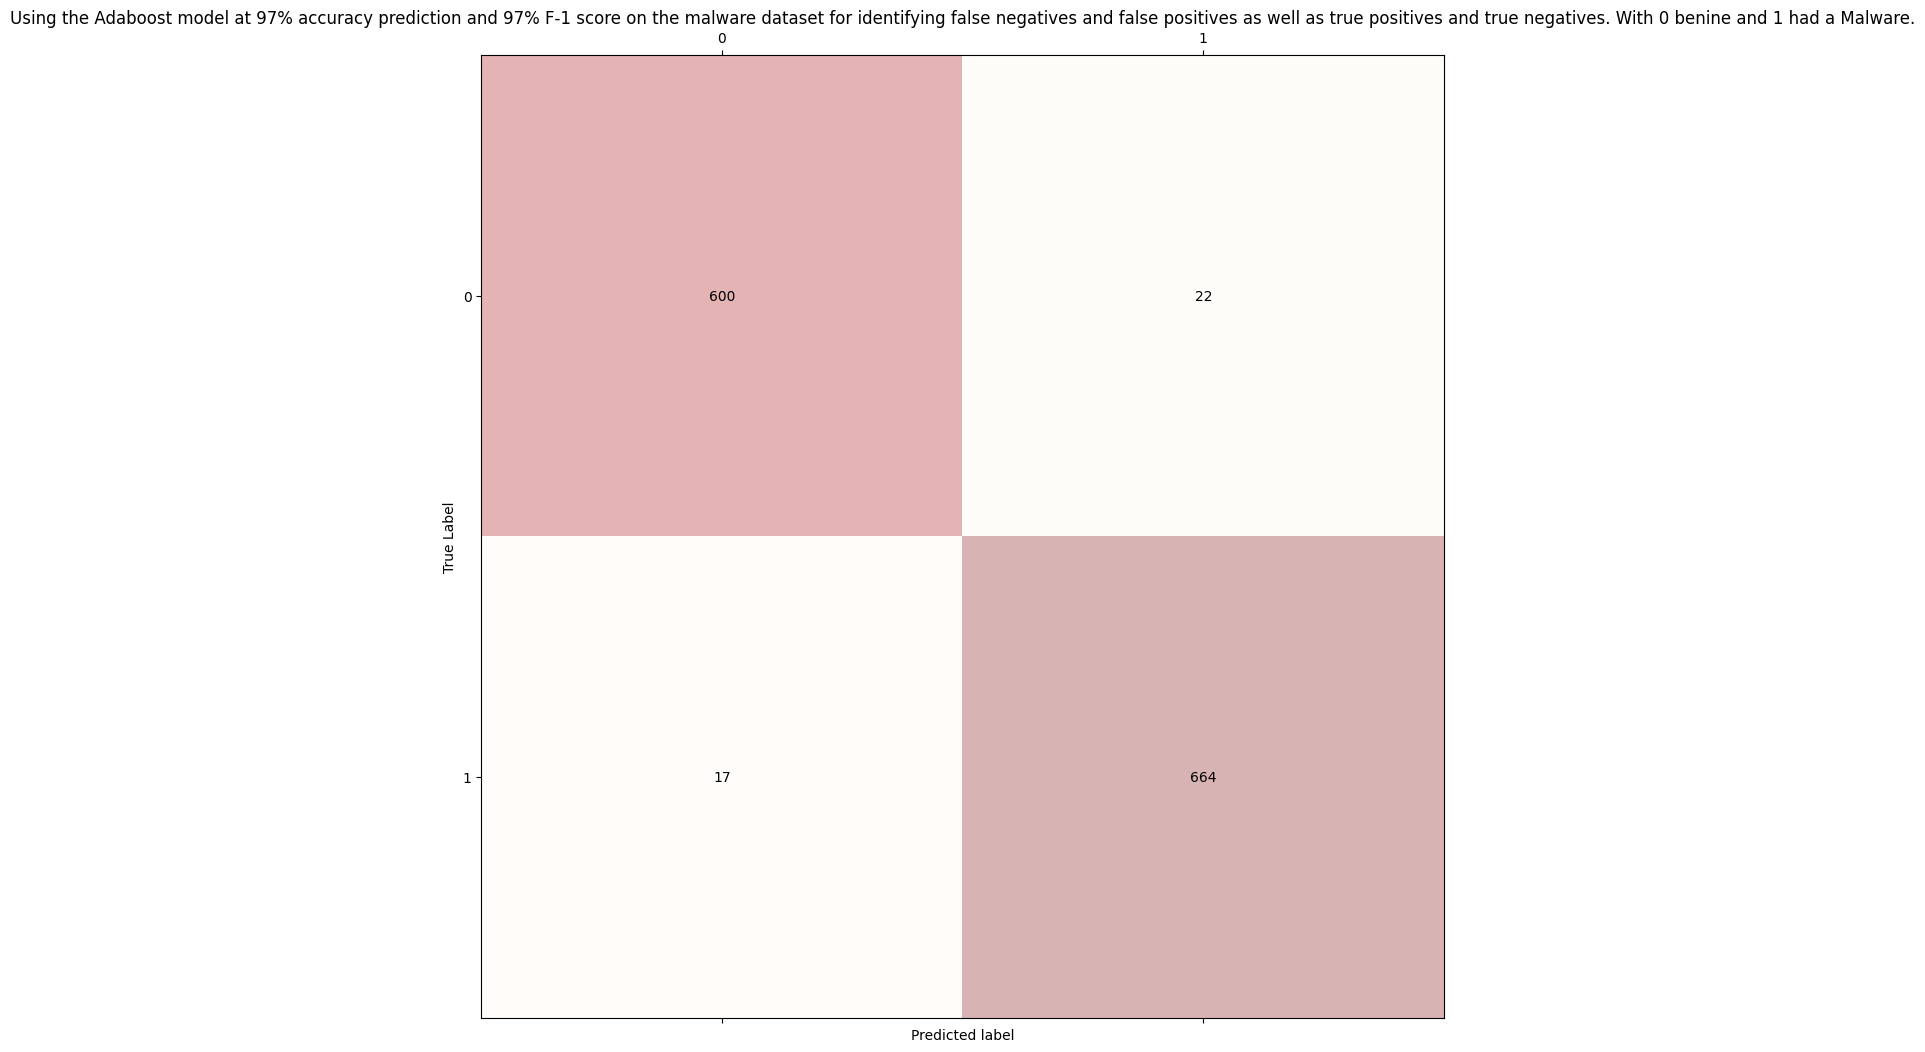

In [32]:
confmat1=confusion_matrix(y_true=y_test, y_pred=y_clf)
print(confmat1)

fig, ax =plt.subplots(figsize=(12.5, 12.5))
ax.matshow(confmat1,  cmap=plt.cm.OrRd, alpha=0.30)
for i in range(confmat1.shape[0]):
  for j in range(confmat1.shape[1]):
    ax.text(x=j, y=i,
            s=confmat1[i, j],
            va='center', ha='center')
    plt.title('Using the Adaboost model at 97% accuracy prediction and 97% F-1 score on the malware dataset for identifying false negatives and false positives as well as true positives and true negatives. With 0 benine and 1 had a Malware.')
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')

In [34]:
import joblib
joblib.dump(clf, 'model.joblib')

['model.joblib']

In [36]:
import pickle

In [37]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)